# <font color='red'>**ELO Merchant Category Recommendation**</font>

## **Introduction to problem statement**

This is the Featured prediction competition which was held by Elo. Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. Based on the interest of customers they would give the promotions. So in this task we need to predict the loyalty scores for each customer based on his  transaction history which will Help understand customer loyalty.

## **Business problem**

The problem at hand is do these promotions actually benefit the customer or the merchant. And if they are useful then how much?  Do merchants see repeat business from the customers  to whom they had given promotions earlier.
This problem could be addressed by predicting the loyalty scores of the customers. Each cardholder will have a loyalty score. This loyalty score will give the information about the customers behaviour, how oftenly he used those promotions , his spending pattern. So the company could provide more promotions to his loyal customers rather than randomly distributing them. This input will improve customer's lives and help Elo reduce unwanted campaigns, to create the right experience for customers and to increase the revenue of the merchants.


## **Mapping to ML Problem**

We have to predict the loyalty scores which is a real valued feature, so we have to build a regression model which minimizes the difference between actual loyalty score and predicted loyalty score.


####**Performance metric we are using.**

Performance metric used in this challenge is Root Mean Squared Error(RMSE). As it minimizes the squared difference between actual loyalty score and predicted loyalty score, So it perfectly matches to our ML Problem.


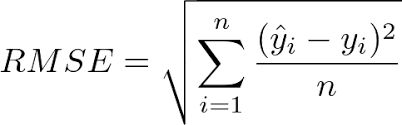

where y^  is the predicted loyalty score for each card_id  and y is the actual loyalty score assigned to a card_id.


# Downloading the Dataset 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayushpattiwar","key":"0528b921a4e9d9c2da41dd72cdfef52d"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c elo-merchant-category-recommendation

  0% 0.00/1.13M [00:00<?, ?B/s]
100% 1.13M/1.13M [00:00<00:00, 74.6MB/s]
 95% 521M/548M [00:12<00:00, 42.8MB/s]
100% 548M/548M [00:12<00:00, 45.0MB/s]
  0% 0.00/17.2k [00:00<?, ?B/s]
100% 17.2k/17.2k [00:00<00:00, 12.2MB/s]
 71% 9.00M/12.7M [00:00<00:00, 21.6MB/s]
100% 12.7M/12.7M [00:00<00:00, 25.8MB/s]
 77% 38.0M/49.4M [00:01<00:01, 9.44MB/s]
100% 49.4M/49.4M [00:01<00:00, 31.9MB/s]
  0% 0.00/17.2k [00:00<?, ?B/s]
100% 17.2k/17.2k [00:00<00:00, 16.6MB/s]
  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 55.3MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 96.1MB/s]


In [ ]:
! unzip '/content/historical_transactions.csv.zip'

! unzip '/content/merchants.csv.zip'

! unzip '/content/new_merchant_transactions.csv.zip'

! unzip '/content/train.csv.zip'

! unzip '/content/test.csv.zip'

Archive:  /content/historical_transactions.csv.zip
  inflating: historical_transactions.csv  
Archive:  /content/merchants.csv.zip
  inflating: merchants.csv           
Archive:  /content/new_merchant_transactions.csv.zip
  inflating: new_merchant_transactions.csv  
Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/test.csv.zip
  inflating: test.csv                


# Loading the files

In [ ]:
def reduce_mem_usage(df, verbose=True):

  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2    
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)  
          else:
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)    
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

In [ ]:
hist_trans = reduce_mem_usage(pd.read_csv('/content/historical_transactions.csv'))
new_merchant_trans = reduce_mem_usage(pd.read_csv('new_merchant_transactions.csv'))
merchants = reduce_mem_usage(pd.read_csv('merchants.csv'))
train = reduce_mem_usage(pd.read_csv('train.csv'))
test = reduce_mem_usage(pd.read_csv('test.csv'))

Mem. usage decreased to 1749.11 Mb (43.7% reduction)
Mem. usage decreased to 114.20 Mb (45.5% reduction)
Mem. usage decreased to 30.32 Mb (46.0% reduction)
Mem. usage decreased to  4.04 Mb (56.2% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)


# Exploratory Data Analysis


### **1. Exploring Train.csv**

### **1.1. Overview**

In [ ]:
train.shape

(201917, 6)

In [ ]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790


In [ ]:
train.dtypes

first_active_month     object
card_id                object
feature_1                int8
feature_2                int8
feature_3                int8
target                float16
dtype: object

In [ ]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

There are no null values so no need of imputing.

### 1.2 Exploring target variable

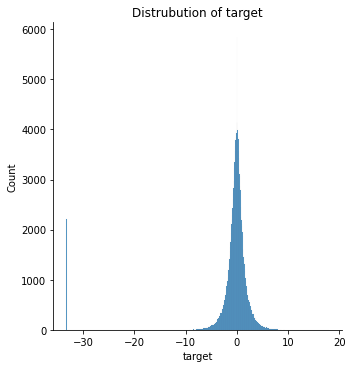

In [ ]:
sns.displot(train['target'])
plt.title('Distrubution of target')
plt.show()

In [ ]:
train['target'].value_counts()

-33.218750    2207
 0.000000     1630
 1.000000      145
-1.000000      114
-0.584961       57
              ... 
-0.119080        1
-0.011208        1
 0.001559        1
 0.040466        1
 0.020569        1
Name: target, Length: 19435, dtype: int64

1.  All the values lies between -10 to 10.
2. the value -33.218750 seems to be outlier or some lind of values given to particular type of cardholders. So, we should remove them.
3. There are total of 2207 outlier points and that is a significant number.

1.3 Exploring anonymized features

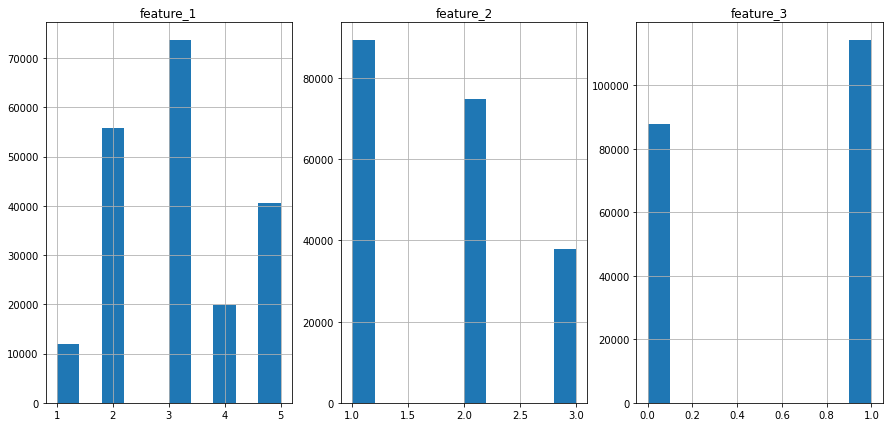

In [ ]:
fig, axes = plt.subplots(1, 3,figsize = (15, 7))
train['feature_1'].hist(ax=axes[0])
axes[0].set_title('feature_1')
train['feature_2'].hist(ax=axes[1])
axes[1].set_title('feature_2')
train['feature_3'].hist(ax=axes[2])
axes[2].set_title('feature_3')
plt.show()

1. We can clearly see that this anonymous variabels are categorical in nature.
2. Elo havent provided any specific info. about those categories.
3. Feature_1 takes 5 values i.e. [1,2,3,4,5] and maximum customers belongs to  category 3
4.  Feature_2 takes 3 values i.e. [1,2,3] and maximum customers belongs to category 3
5. Feature_3 is a binary variable either takes 0 0r 1. maximum customers belongs to 1
6. All these variabels should be categorically encoded


### 1.3.1 Lets check weather these features influence the target

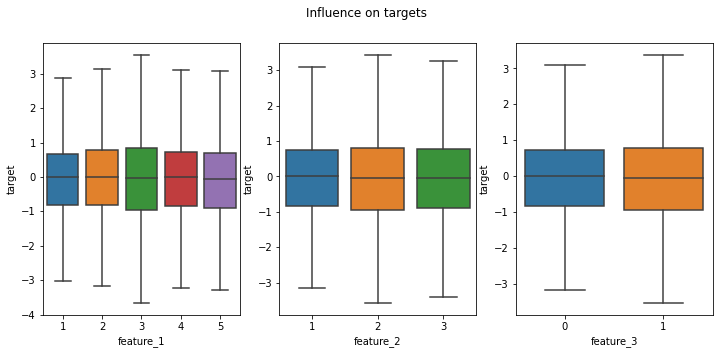

In [ ]:
columns=['feature_1','feature_2','feature_3']
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
plt.suptitle('Influence on targets')
for idx, feature in enumerate(columns):
  sns.boxplot(x=feature, y="target", data=train, ax=ax[idx], showfliers=False)

As we can see that all the features are almost overlapping with each other. Distrubution looks similar so they are not much usefull in predicting the target class

### 1.4 Exploring Date feature

In [ ]:
train['first_active_month']=pd.to_datetime(train['first_active_month'])

In [ ]:
train['first_active_month'].value_counts()

2017-09-01    13878
2017-10-01    13695
2017-08-01    13638
2017-11-01    12930
2017-07-01    12363
              ...  
2012-03-01       10
2011-11-01        8
2012-02-01        7
2011-12-01        2
2018-02-01        1
Name: first_active_month, Length: 75, dtype: int64

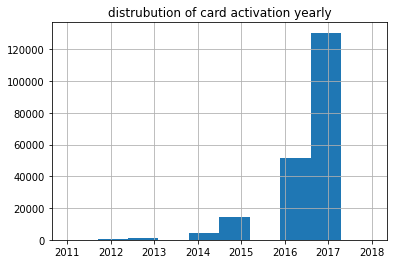

In [ ]:
train['first_active_month'].dt.year.hist()
plt.title('distrubution of card activation yearly')
plt.show()

1. The above plot says that the data is from 6 different years i.e. 2012, 2013, 2014, 2015, 2016, 2017
2. Maximum data comes from 2016 and 2017.

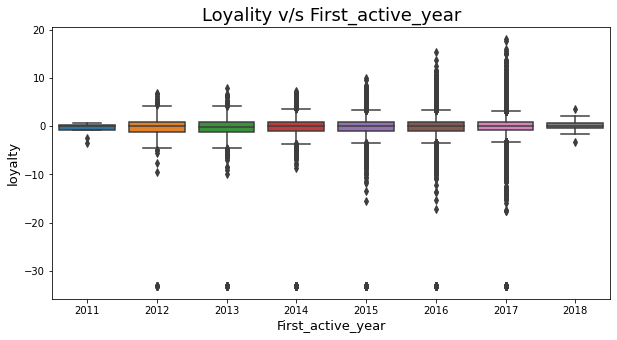

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train['first_active_month'].dt.year,y="target",data=train)
plt.xlabel('First_active_year',fontsize=13)
plt.ylabel('loyalty',fontsize=13)
plt.title('Loyality v/s First_active_year',fontsize=18)
plt.show()

All the distrubutions are ovelapping so we need to engineer some more features based on dates.

### 1.5 Checking for correlation

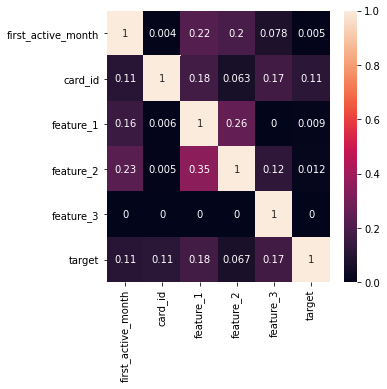

In [ ]:
corr = train.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_norm=np.round((corr-corr.min())/(corr.max()-corr.min()), 3)
plt.figure(figsize=(5,5))
sns.heatmap(corr_norm, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

Feature_1 and Feature_2 seems to be correlated with each other. Other features are fairely independant.

## 2. Exploring Historical_transactions.csv

### 2.1 Overview

In [ ]:
hist_trans.shape

(29112361, 14)

In [ ]:
hist_trans.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

Category_3, Category_2 and merchant_id have null values. Need to be imputed.

In [ ]:
print('Percentage of missing values in category_3 is ',hist_trans['category_3'].isnull().sum()/len(hist_trans)*100,'%')
print('Percentage of missing values in merchant_id is ',hist_trans['merchant_id'].isnull().sum()/len(hist_trans)*100,'%')
print('Percentage of missing values in category_2 is ',hist_trans['category_2'].isnull().sum()/len(hist_trans)*100,'%')
print('Percentage of missing values in whole datset is ',hist_trans.isnull().sum().sum()/len(hist_trans)*100,'%')

Percentage of missing values in category_3 is  0.6119702898710276 %
Percentage of missing values in merchant_id is  0.4756776683278969 %
Percentage of missing values in category_2 is  9.1125003568072 %
Percentage of missing values in whole datset is  10.200148315006125 %


10.2 percentage of data is missing in the datset is missing that is fairely a large number, so needed to be imputed

In [ ]:
hist_trans.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
hist_trans.dtypes

authorized_flag          object
card_id                  object
city_id                   int16
category_1               object
installments              int16
category_3               object
merchant_category_id      int16
merchant_id              object
month_lag                  int8
purchase_amount         float32
purchase_date            object
category_2              float16
state_id                   int8
subsector_id               int8
dtype: object

In [ ]:
hist_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

### 2.2. Exploring the Anonymised category

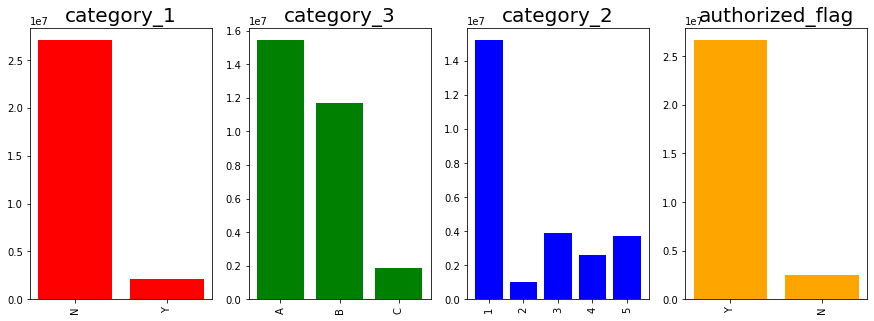

In [ ]:
columns=['category_1','category_3','category_2','authorized_flag']
no=0
colour=['red','green','blue','orange']
plt.figure(figsize=(15,5))
for i in columns:
  no=no+1
  plt.subplot(1,4,no)
  value_count = hist_trans[i].value_counts()
  x = np.array(value_count.index)
  y = value_count.values
  plt.bar(x,y,color=colour[no-1])
  plt.title(i, fontsize=20)
  plt.xticks(rotation=90)

1. We can clearly see that this anonymous variabels are categorical in nature.
2. Elo havent provided any specific info. about those categories.
3. Category_1 takes 2 values i.e. [Y,N] and maximum customers belongs to N
4. Category_3 takes 3 values i.e. [A,B,C] and maximum customers belongs to A
5. Category_2 takes 3 values i.e. [1,2,3,4,5] and maximum customers belongs to 1
6. Category_4 takes 3 values i.e. [Y,N] and maximum customers belongs to Y
7. All these variabels should be categorically encoded

### 2.3. Exploring other features

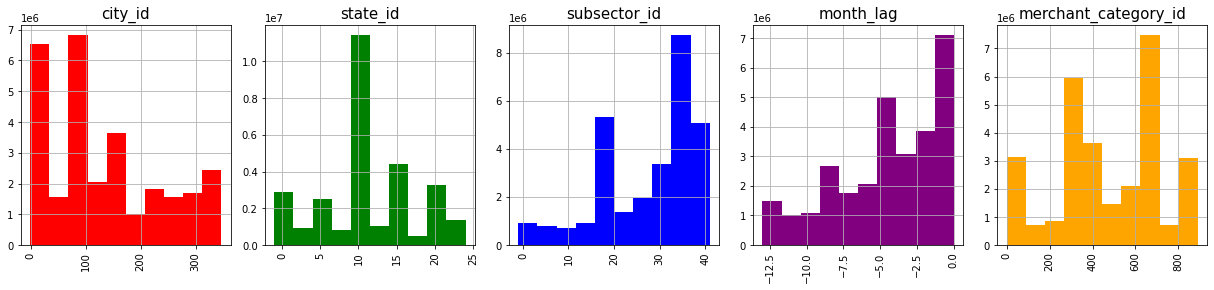

In [ ]:
columns=['city_id','state_id','subsector_id','month_lag','merchant_category_id']
no=0
colour=['red','green','blue','purple','orange']
plt.figure(figsize=(17,4))
for i in columns:
  no=no+1
  plt.subplot(1,5,no)
  hist_trans[i].hist(color=colour[no-1])
  plt.title(i, fontsize=15)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

All these features are randomly distrubuted so dosent gives much insights.

### 2.3. Exploring the installments

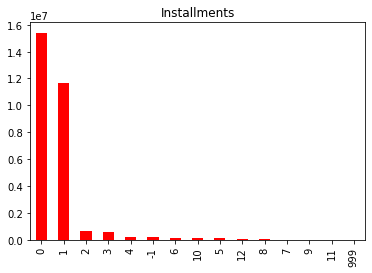

In [ ]:
hist_trans['installments'].value_counts().plot(kind='bar', title= 'Installments', color = 'red')
plt.show()

In [ ]:
hist_trans['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

999 seems fishy.They are outliers or misinterpreted points, therefore needed to be removed. There are total of 188 such points.

### 2.4. Exploring the Purchase Amount

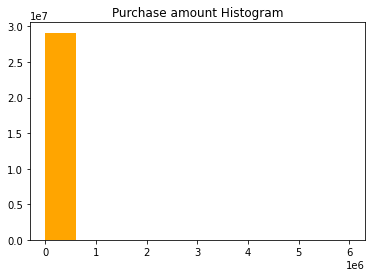

In [ ]:
plt.hist(hist_trans['purchase_amount'], color='orange')
plt.title('Purchase amount Histogram')
plt.show()

In [ ]:
for i in range(0,100,5):
  var =hist_trans['purchase_amount'].values
  var = np.sort(var,axis = None)
  print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -0.7469077706336975
5 percentile value is -0.7381924390792847
10 percentile value is -0.7334139943122864
15 percentile value is -0.7296273112297058
20 percentile value is -0.7246986031532288
25 percentile value is -0.7203559279441833
30 percentile value is -0.7168547511100769
35 percentile value is -0.7104684710502625
40 percentile value is -0.7037065625190735
45 percentile value is -0.6980716586112976
50 percentile value is -0.6883494853973389
55 percentile value is -0.6782967448234558
60 percentile value is -0.6704228520393372
65 percentile value is -0.6550056338310242
70 percentile value is -0.6331570744514465
75 percentile value is -0.6032543182373047
80 percentile value is -0.5710976123809814
85 percentile value is -0.5188053250312805
90 percentile value is -0.4281954765319824
95 percentile value is -0.1686124950647354
100 percentile value is  6010604.0


In [ ]:
for i in range(95,100,1):
  var =hist_trans['purchase_amount'].values
  var = np.sort(var,axis = None)
  print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

95 percentile value is -0.1686124950647354
96 percentile value is -0.05286327004432678
97 percentile value is 0.13003942370414734
98 percentile value is 0.45521315932273865
99 percentile value is 1.2208590507507324
100 percentile value is  6010604.0


100th percentile values seems to be an outlier so needed to be removed.

### 2.5. Analysing the impact of some features on Loyalty_scores

We need to combine the train data with the historical_transactions data, so that we can see the impact of historical_transaction features of on the target. 

In [ ]:
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
a = hist_trans.groupby(['card_id']).size().reset_index() # grouping based on card_id
a.columns = ['card_id', 'No_of_trans'] # finding total no of transaction each card made in past
train_df = pd.merge(train, a, on="card_id", how="left") # merging it with train
test_df = pd.merge(test, a, on="card_id", how="left") # merging it with test

In [ ]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,No_of_trans
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,260
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,350
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,43
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,77
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,133


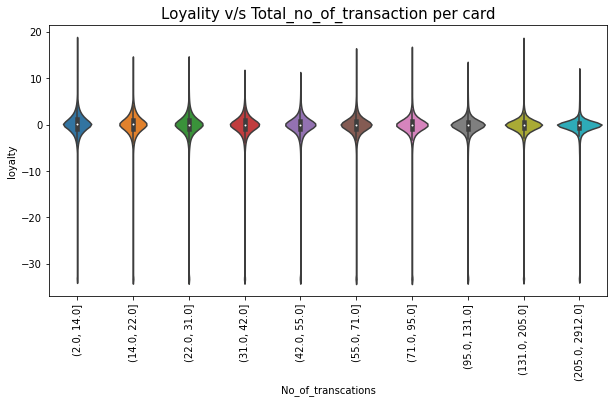

In [ ]:
# here we will create 10 bins based on percentile value to represent the data using boxplot
plt.figure(figsize=(10,5))
bins = np.percentile(train_df['No_of_trans'], range(0,101,10))
train_df['binned_No_of_trans'] = pd.cut(train_df['No_of_trans'], bins)
sns.violinplot(x="binned_No_of_trans", y='target', data=train_df, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('No_of_transcations',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s Total_no_of_transaction per card',fontsize=15)
plt.show()

We can clearly see that loyalty decreases with increasing no_of_transactions

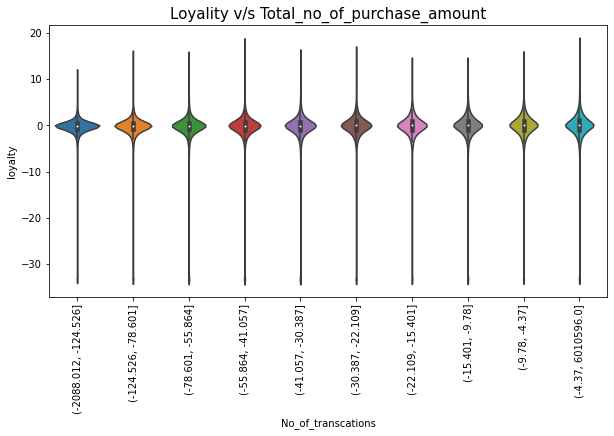

In [ ]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html
plt.figure(figsize=(10,5))
bins = np.percentile(train_df1['purchase_amount'], range(0,101,10))
train_df1['binned_num_category_2'] = pd.cut(train_df1['purchase_amount'], bins)
sns.violinplot(x="binned_num_category_2", y='target', data=train_df1, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('No_of_transcations',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s Total_no_of_purchase_amount',fontsize=15)
plt.show()

We can clearly see that loyalty increases with increasing no_of_transactions

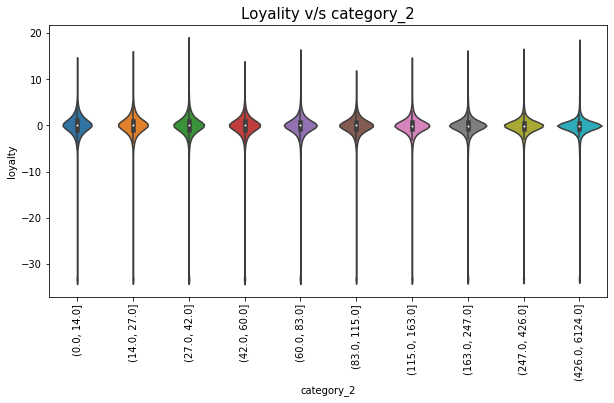

In [ ]:
plt.figure(figsize=(10,5))
bins = np.percentile(train_df1['category_2'], range(0,101,10))
train_df1['binned_category_2'] = pd.cut(train_df1['category_2'], bins)
sns.violinplot(x="binned_category_2", y='target', data=train_df1, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('category_2',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s category_2',fontsize=15)
plt.show()

### 2.6. Taking look at some bivariate analysis

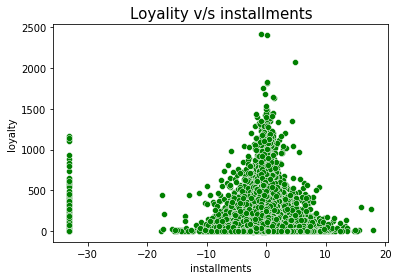

In [ ]:
sns.scatterplot(x=train_df1['target'], y=train_df1['installments'], color='green')
plt.xlabel('installments',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s installments',fontsize=15)
plt.show()

We can see that as installments increases lotality score tends to decrease

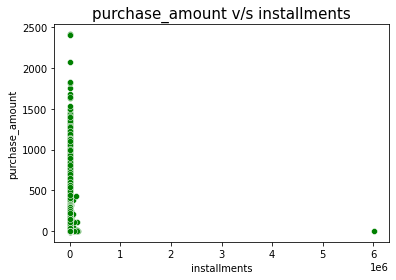

In [ ]:
sns.scatterplot(x=train_df1['purchase_amount'], y=train_df1['installments'], color='green')
plt.xlabel('installments',fontsize=10)
plt.ylabel('purchase_amount',fontsize=10)
plt.title('purchase_amount v/s installments',fontsize=15)
plt.show()

We can see that there are some outlier in installments section which can heavily impact thing so needed to be removed.

### Exploring features based on Authorized flag

In [ ]:
hist_trans['authorized_flag'].value_counts()

1    26595452
0     2516909
Name: authorized_flag, dtype: int64

In [ ]:
hist_trans['authorized_flag']=hist_trans['authorized_flag'].map({'Y':1,'N':0})

In [ ]:
new9 = hist_trans.groupby('card_id')[['authorized_flag']].sum() # here we will sum all the numerical features for each card.
train_df9 = pd.merge(train, new9, on="card_id", how="left") # merge aggrigated features train_data

In [ ]:
train_df9.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312,247
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822,339
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988,41
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456,77
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790,128


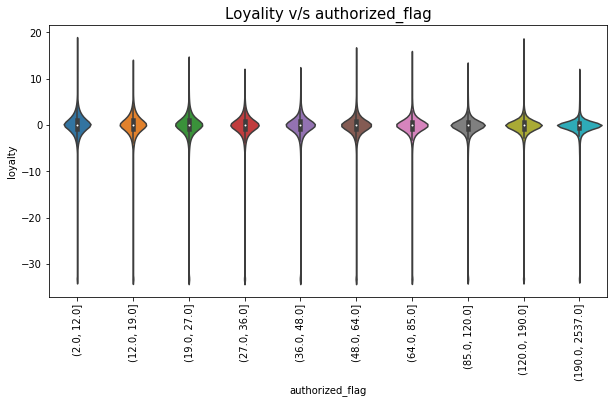

In [ ]:
plt.figure(figsize=(10,5))
bins = np.percentile(train_df9['authorized_flag'], range(0,101,10))
train_df9['binned_authorized_flag'] = pd.cut(train_df9['authorized_flag'], bins)
sns.violinplot(x="binned_authorized_flag", y='target', data=train_df9, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('authorized_flag',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s authorized_flag',fontsize=15)
plt.show()

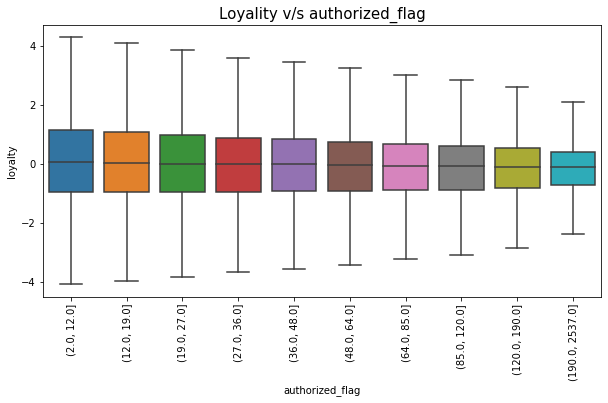

In [ ]:
plt.figure(figsize=(10,5))
bins = np.percentile(train_df9['authorized_flag'], range(0,101,10))
train_df9['binned_authorized_flag'] = pd.cut(train_df9['authorized_flag'], bins)
sns.boxplot(x="binned_authorized_flag", y='target', data=train_df9, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('authorized_flag',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s authorized_flag',fontsize=15)
plt.show()

We can clearly see that as no of authorized transaction decreases loyality scores decreases.

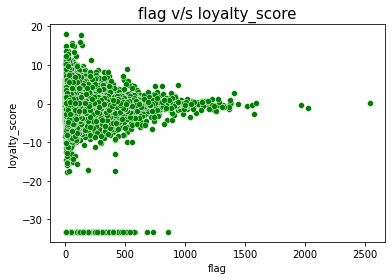

In [ ]:
sns.scatterplot(x=train_df9['authorized_flag'], y=train_df9['target'], color='green')
plt.xlabel('flag',fontsize=10)
plt.ylabel('loyalty_score',fontsize=10)
plt.title('flag v/s loyalty_score',fontsize=15)
plt.show()

## 3 Exploring new_merchant_trans.csv

### 3.1. Overview

In [ ]:
 new_merchant_trans.shape

(1963031, 14)

In [ ]:
new_merchant_trans.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

Category_3, Category_2 and merchant_id have null values. Need to be imputed.

In [ ]:
print('Percentage of missing values in category_3 is ',new_merchant_trans['category_3'].isnull().sum()/len(new_merchant_trans)*100,'%')
print('Percentage of missing values in merchant_id is ',new_merchant_trans['merchant_id'].isnull().sum()/len(new_merchant_trans)*100,'%')
print('Percentage of missing values in category_2 is ',new_merchant_trans['category_2'].isnull().sum()/len(new_merchant_trans)*100,'%')
print('Percentage of missing values in overall data is ',new_merchant_trans.isnull().sum().sum()/len(new_merchant_trans)*100,'%')

Percentage of missing values in category_3 is  2.8487578647509895 %
Percentage of missing values in merchant_id is  1.3354857870303627 %
Percentage of missing values in category_2 is  5.692472508075522 %
Percentage of missing values in overall data is  9.876716159856874 %


9.87 % of data is missing that is an significant number so, needed to be imputed

In [ ]:
new_merchant_trans.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
new_merchant_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

### 3.2. Exploring Anonymous categories

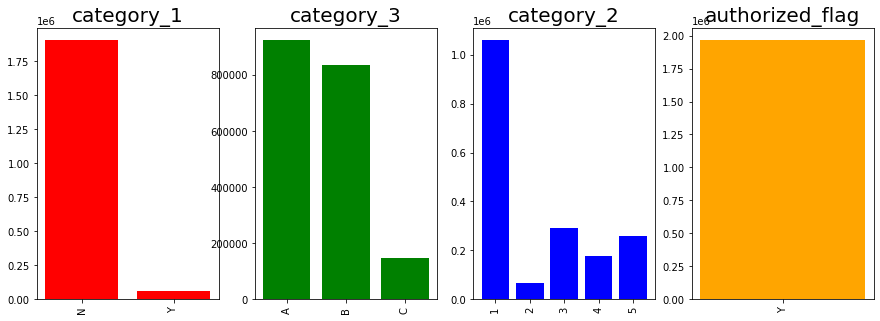

In [ ]:
columns=['category_1','category_3','category_2','authorized_flag']
no=0
colour=['red','green','blue','orange']
plt.figure(figsize=(15,5))
for i in columns:
  no=no+1
  plt.subplot(1,4,no)
  value_count = new_merchant_trans[i].value_counts()
  x = np.array(value_count.index)
  y = value_count.values
  plt.bar(x,y,color=colour[no-1])
  plt.title(i, fontsize=20)
  plt.xticks(rotation=90)

1. We can clearly see that this anonymous variabels are categorical in nature.
2. Elo havent provided any specific info. about those categories.
3. Category_1 takes 2 values i.e. [Y,N] and maximum customers belongs to N
4. Category_3 takes 3 values i.e. [A,B,C] and maximum customers belongs to A and B
6. Category_2 takes 5 values i.e. [1,2,3,4,5] and maximum customers belongs to 1
7. Category_4 has only one value that is Y so we dont need this column. so, we need to drop this column.
8. All these variabels should be categorically encoded

### 3.3. Exploring other features

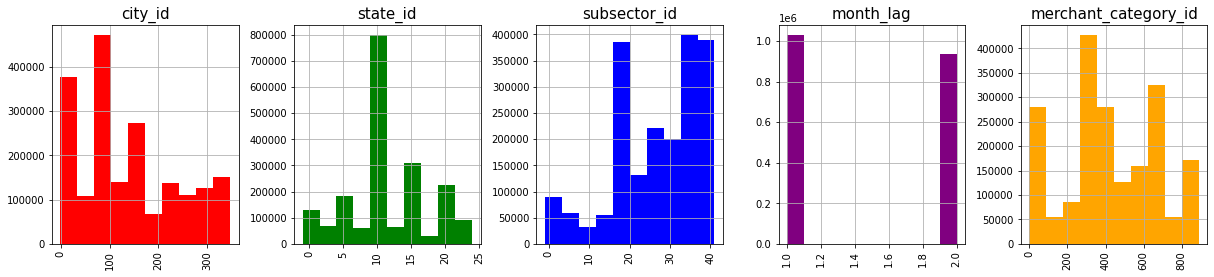

In [ ]:
columns=['city_id','state_id','subsector_id','month_lag','merchant_category_id']
no=0
colour=['red','green','blue','purple','orange']
plt.figure(figsize=(17,4))
for i in columns:
  no=no+1
  plt.subplot(1,5,no)
  new_merchant_trans[i].hist(color=colour[no-1])
  plt.title(i, fontsize=15)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.4. Exploring Installments

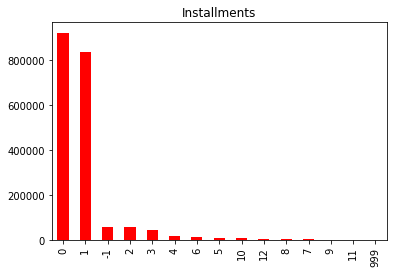

In [ ]:
new_merchant_trans['installments'].value_counts().plot(kind='bar', title= 'Installments', color = 'red')
plt.show()

In [ ]:
new_merchant_trans['installments'].value_counts()

 0      922244
 1      836178
-1       55922
 2       54729
 3       44750
 4       14815
 6       10389
 5        9296
 10       8899
 12       2850
 8        1555
 7         863
 9         478
 11         61
 999         2
Name: installments, dtype: int64

999 seems fishy.They are outliers or misinterpreted points, therefore needed to be removed. There are only 2 such points.

### 3.5. Exploring Purchase Amount

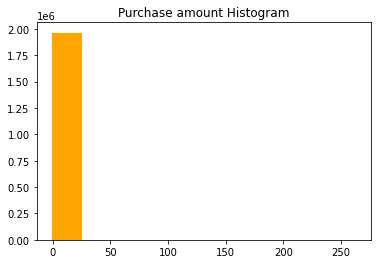

In [ ]:
plt.hist(new_merchant_trans['purchase_amount'], color='orange')
plt.title('Purchase amount Histogram')
plt.show()

In [ ]:
for i in range(0,100,5):
  var =new_merchant_trans['purchase_amount'].values
  var = np.sort(var,axis = None)
  print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -0.7470703125
5 percentile value is -0.736328125
10 percentile value is -0.73193359375
15 percentile value is -0.72607421875
20 percentile value is -0.72021484375
25 percentile value is -0.716796875
30 percentile value is -0.70947265625
35 percentile value is -0.70166015625
40 percentile value is -0.69580078125
45 percentile value is -0.68701171875
50 percentile value is -0.6748046875
55 percentile value is -0.66748046875
60 percentile value is -0.65234375
65 percentile value is -0.6328125
70 percentile value is -0.607421875
75 percentile value is -0.58154296875
80 percentile value is -0.53662109375
85 percentile value is -0.476806640625
90 percentile value is -0.371337890625
95 percentile value is -0.08575439453125
100 percentile value is  263.2


100th percentile value i.e. 263.2 seem to be an outlier so needed to be removed.

### 3.6. Having a look at Correlation matrix

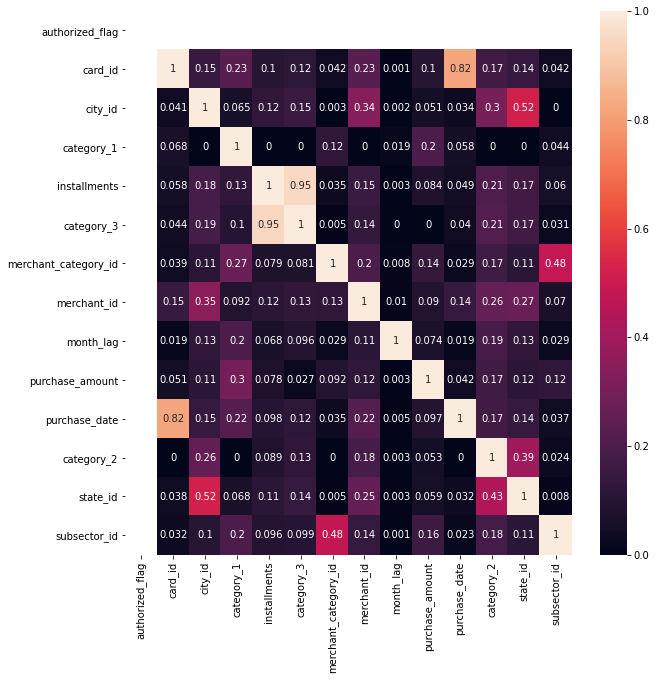

In [ ]:
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
corr = new_merchant_trans.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_norm=np.round((corr-corr.min())/(corr.max()-corr.min()), 3)
plt.figure(figsize=(10,10))
sns.heatmap(corr_norm, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

1. Installments and category_3 are correlated.
2. card_id and purchase dates are also related to each other.
3. sate_id and city_id are also related to each other.

### 3.7. Analysing the impact of some features on Loyalty_scores

We need to combine the train data with the new_merchants_transactions data, so that we can see the impact of new_merchants_transaction features of on the target.

In [ ]:
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
a = new_merchant_trans.groupby(['card_id']).size().reset_index() # grouping based on card_id
a.columns = ['card_id', 'No_of_trans'] # finding total no of transaction each card made in past
train_df2 = pd.merge(train, a, on="card_id", how="left") # merging it with train
test_df2 = pd.merge(test, a, on="card_id", how="left") # merging it with test

In [ ]:
train_df2.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,No_of_trans
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,23.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,6.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,1.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,7.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,36.0


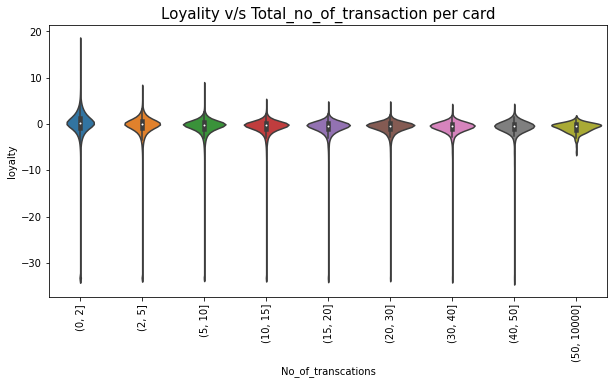

In [ ]:
# here we will create 10 bins based on percentile value to represent the data using boxplot
plt.figure(figsize=(10,5))
bins = [0, 2, 5, 10, 15, 20, 30, 40, 50, 10000]
train_df2['binned_No_of_trans'] = pd.cut(train_df2['No_of_trans'], bins)
sns.violinplot(x="binned_No_of_trans", y='target', data=train_df2, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('No_of_transcations',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s Total_no_of_transaction per card',fontsize=15)
plt.show()

We can clearly see that loyalty decreases with increasing no_of_transactions

In [ ]:
new = new_merchant_trans.groupby('card_id')[['installments', 'purchase_amount', 'category_1', 'category_2',	'category_3']].sum() # here we will sum all the numerical features for each card.
train_df3 = pd.merge(train, new, on="card_id", how="left") # merge aggrigated features train_data

In [ ]:
train_df3.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,installments,purchase_amount,category_2
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,4,-165.968735,272.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,543,-210.006332,319.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,0,-29.167391,199.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,84,-49.491364,224.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,182,-48.687656,443.0


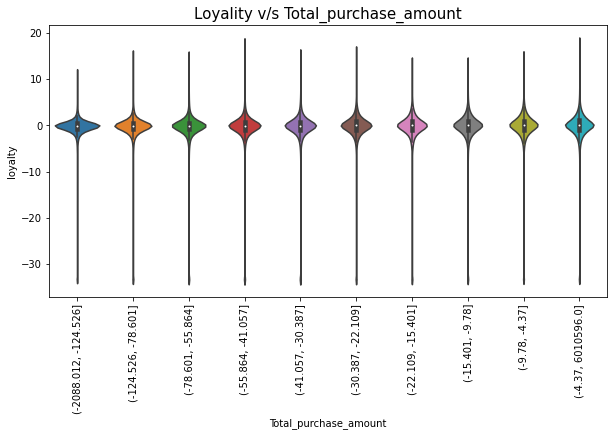

In [ ]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html
plt.figure(figsize=(10,5))
bins = np.percentile(train_df3['purchase_amount'], range(0,101,10))
train_df3['binned_purchase_amount'] = pd.cut(train_df3['purchase_amount'], bins)
sns.violinplot(x="binned_purchase_amount", y='target', data=train_df3, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Total_purchase_amount',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s Total_purchase_amount',fontsize=15)
plt.show()

We can clearly see that loyalty increases with increasing total purchase.

### 3.8. Cheking some bivariate analysis

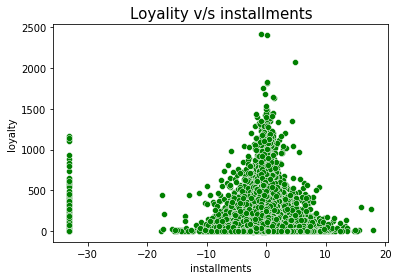

In [ ]:
sns.scatterplot(x=train_df3['target'], y=train_df3['installments'], color='green')
plt.xlabel('installments',fontsize=10)
plt.ylabel('loyalty',fontsize=10)
plt.title('Loyality v/s installments',fontsize=15)
plt.show()

loyality score tend to decrese when installments starts to increase.

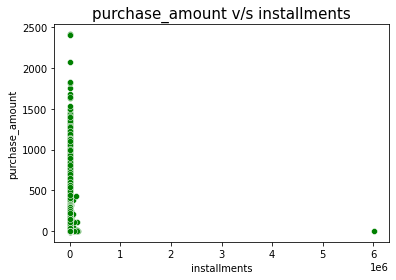

In [ ]:
sns.scatterplot(x=train_df3['purchase_amount'], y=train_df3['installments'], color='green')
plt.xlabel('installments',fontsize=10)
plt.ylabel('purchase_amount',fontsize=10)
plt.title('purchase_amount v/s installments',fontsize=15)
plt.show()

There are some ouliers in installmets which are needed to be removed otherwise it can impact the results 

## 4. Exploring Merchant.csv 

### 4.1 Overview

In [ ]:
merchants.shape

(334696, 22)

In [ ]:
merchants.dtypes

merchant_id                     object
merchant_group_id                int32
merchant_category_id             int16
subsector_id                      int8
numerical_1                    float16
numerical_2                    float16
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float32
avg_purchases_lag3             float64
active_months_lag3                int8
avg_sales_lag6                 float32
avg_purchases_lag6             float64
active_months_lag6                int8
avg_sales_lag12                float32
avg_purchases_lag12            float64
active_months_lag12               int8
category_4                      object
city_id                          int16
state_id                          int8
category_2                     float16
dtype: object

In [ ]:
merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [ ]:
print('Percentage of missing values in avg_sales_lag3 is ',merchants['avg_sales_lag3'].isnull().sum()/len(merchants)*100)
print('Percentage of missing values in avg_sales_lag6 is ',merchants['avg_sales_lag6'].isnull().sum()/len(merchants)*100)
print('Percentage of missing values in avg_sales_lag12 is ',merchants['avg_sales_lag12'].isnull().sum()/len(merchants)*100)
print('Percentage of missing values in category_2 is ',merchants['category_2'].isnull().sum()/len(merchants)*100)
print('Percentage of missing values in whole dataset is ',merchants.isnull().sum().sum()/len(merchants)*100)

Percentage of missing values in avg_sales_lag3 is  0.0038841217104476898
Percentage of missing values in avg_sales_lag6 is  0.0038841217104476898
Percentage of missing values in avg_sales_lag12 is  0.0038841217104476898
Percentage of missing values in category_2 is  3.551581136314745
Percentage of missing values in whole dataset is  3.5632335014460885


Avg sales lag has just 0.003% of missing values so thay can be dropped and category_2 has fair number of nan values so needed to be imputed

In [ ]:
merchants.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,9.666667,3,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,1.750000,3,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,260.000000,2,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

### 4.2. Exploring numerical features

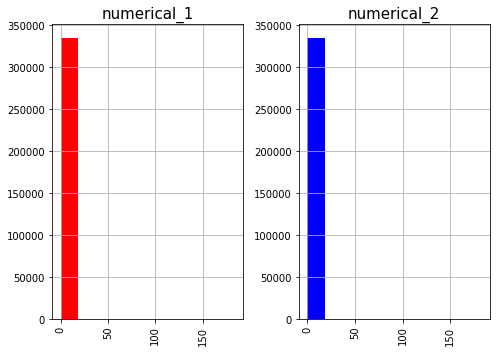

In [ ]:
columns=['numerical_1', 'numerical_2']
plt.figure(figsize=(7,5))
no=0
colour=['red','blue']
for i in columns:
  no=no+1
  plt.subplot(1,2,no)
  merchants[i].hist(color=colour[no-1])
  plt.title(i, fontsize=15)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in columns:
  print(i)
  print(merchants[i].describe())

numerical_1
count    334696.000000
mean          0.011482
std           0.000000
min          -0.057465
25%          -0.057465
50%          -0.057465
75%          -0.047546
max         183.750000
Name: numerical_1, dtype: float64
numerical_2
count    334696.000000
mean          0.008095
std           0.000000
min          -0.057465
25%          -0.057465
50%          -0.057465
75%          -0.047546
max         182.125000
Name: numerical_2, dtype: float64


Both the features are copy of each other as they have same attributes. Both of them are highly correlated and that is nood good for a model. So, one of them should be dropped

### 4.3. Exploring Anonymised categorical features

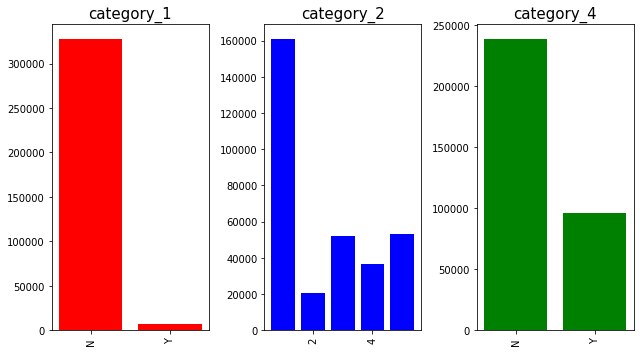

In [ ]:
columns=['category_1', 'category_2','category_4']
plt.figure(figsize=(9,5))
no=0
colour=['red','blue','green']
for i in columns:
  no=no+1
  plt.subplot(1,3,no)
  value_count = merchants[i].value_counts()
  x = np.array(value_count.index)
  y = value_count.values
  plt.bar(x,y,color=colour[no-1])
  plt.title(i, fontsize=15)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. We can clearly see that this anonymous variabels are categorical in nature.
2. Elo havent provided any specific info. about those categories.
3. Category_1 takes 2 values i.e. [Y,N] and maximum merchants belongs to N
4. Category_4 takes 2 values i.e. [Y,N] and maximum merchants belongs to N
5. Category_2 takes 5 values i.e. [1,2,3,4,5] and maximum merchants belongs to 1
6. All these variabels should be categorically encoded

### 4.4. Exploring most_recent_sales_range and most_recent_purchases_range

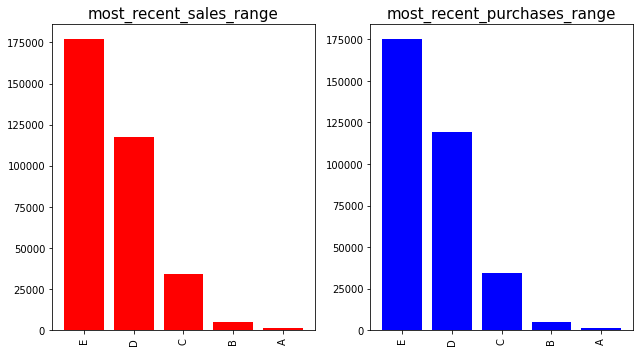

In [ ]:
columns=['most_recent_sales_range','most_recent_purchases_range']
plt.figure(figsize=(9,5))
no=0
colour=['red','blue','green']
for i in columns:
  no=no+1
  plt.subplot(1,2,no)
  value_count = merchants[i].value_counts()
  x = np.array(value_count.index)
  y = value_count.values
  plt.bar(x,y,color=colour[no-1])
  plt.title(i, fontsize=15)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Both the plots come from same distrubution. Thay are also highly correlated .It will be beneficial to drop any one of them.It may be showing some sort of relation because sales are always proportional to purchases. Dominant category is E.

### 4.5. Exploring Avg_sales_lag

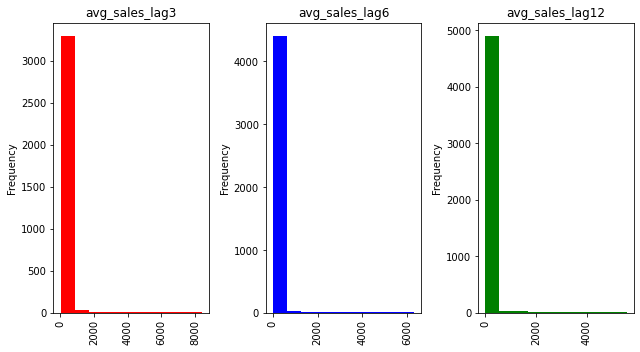

In [ ]:
columns=['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']
plt.figure(figsize=(9,5))
no=0
colour=['red','blue','green']
for i in columns:
  no=no+1
  plt.subplot(1,3,no)
  merchants[i].value_counts().sort_index().plot(kind='hist', color=colour[no-1], title=i)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in columns:
  print(i)
  print(merchants[i].describe())

avg_sales_lag3
count    334683.000000
mean         13.839176
std        2395.453369
min         -82.129997
25%           0.880000
50%           1.000000
75%           1.160000
max      851844.625000
Name: avg_sales_lag3, dtype: float64
avg_sales_lag6
count    3.346830e+05
mean     2.165529e+01
std      3.947046e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.010000e+00
75%      1.230000e+00
max      1.513959e+06
Name: avg_sales_lag6, dtype: float64
avg_sales_lag12
count    3.346830e+05
mean     2.523122e+01
std      5.251777e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64


### 4.6. Exploring Avg_purchase_lag

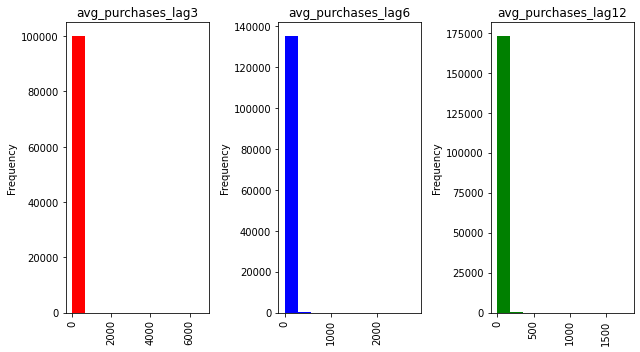

In [ ]:
columns=['avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12']
plt.figure(figsize=(9,5))
no=0
colour=['red','blue','green']
for i in columns:
  no=no+1
  plt.subplot(1,3,no)
  merchants[i].value_counts().sort_index().plot(kind='hist', color=colour[no-1], title=i)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in columns:
  print(i)
  print(merchants[i].describe())

avg_purchases_lag3
count    3.346960e+05
mean              inf
std               NaN
min      3.334953e-01
25%      9.236499e-01
50%      1.016667e+00
75%      1.146522e+00
max               inf
Name: avg_purchases_lag3, dtype: float64
avg_purchases_lag6
count    3.346960e+05
mean              inf
std               NaN
min      1.670447e-01
25%      9.022475e-01
50%      1.026961e+00
75%      1.215575e+00
max               inf
Name: avg_purchases_lag6, dtype: float64
avg_purchases_lag12
count    3.346960e+05
mean              inf
std               NaN
min      9.832954e-02
25%      8.983333e-01
50%      1.043361e+00
75%      1.266480e+00
max               inf
Name: avg_purchases_lag12, dtype: float64


As we can see that maximum value in each of the three category is **INF** which is undesirable lets check these values in detail.

In [ ]:
merchants[merchants['avg_purchases_lag3'].values==np.inf]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
10,M_ID_492cfa500c,13462,369,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057465,-0.057465,Y,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


In [ ]:
merchants[merchants['avg_purchases_lag6'].values==np.inf]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
10,M_ID_492cfa500c,13462,369,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057465,-0.057465,Y,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


In [ ]:
merchants[merchants['avg_purchases_lag12'].values==np.inf]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
10,M_ID_492cfa500c,13462,369,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057465,-0.057465,Y,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


As we can see that same three card_ids are repeating this means that these card_ids values are misinterpreated. So we need to drop these card_ids.

### 4.7. Exploring Active month lags

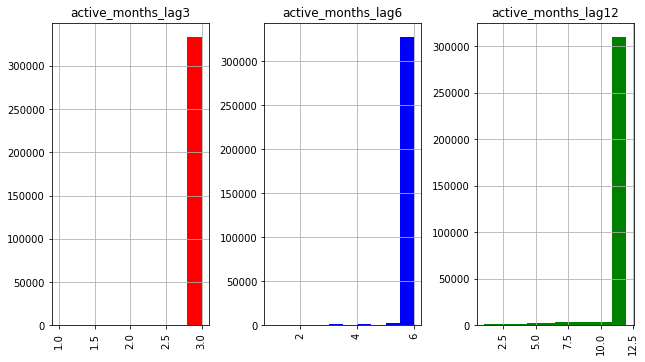

In [ ]:
columns=['active_months_lag3','active_months_lag6','active_months_lag12']
plt.figure(figsize=(9,5))
no=0
colour=['red','blue','green']
for i in columns:
  no=no+1
  plt.subplot(1,3,no)
  merchants[i].hist(color=colour[no-1])
  plt.title(i)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in columns:
  print(i)
  print(merchants[i].value_counts())

active_months_lag3
3    333262
2       896
1       538
Name: active_months_lag3, dtype: int64
active_months_lag6
6    327284
5      2276
4      2050
3      1652
2       896
1       538
Name: active_months_lag6, dtype: int64
active_months_lag12
12    305101
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64


These are categotical features needed to be label encoded.

### 4.8. Exploring other id_features

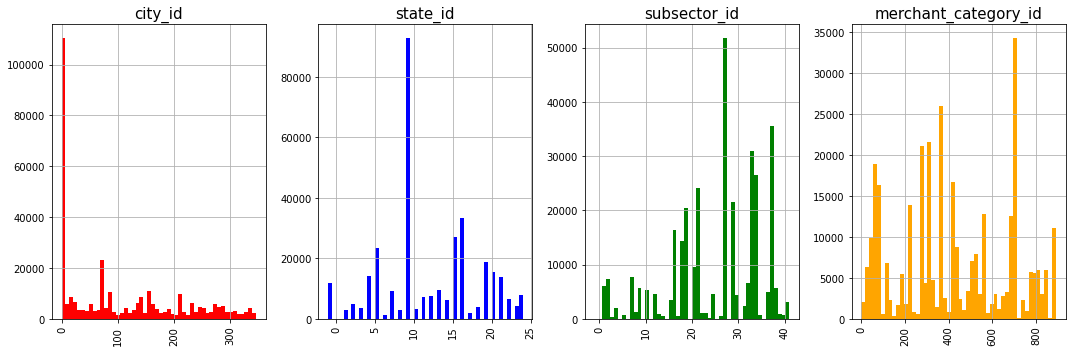

In [ ]:
columns=['city_id','state_id','subsector_id','merchant_category_id']
plt.figure(figsize=(15,5))
no=0
colour=['red','blue','green','orange']
for i in columns:
  no=no+1
  plt.subplot(1,4,no)
  merchants[i].hist(bins=50,color=colour[no-1])
  plt.title(i, fontsize=15)
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in columns:
  print(merchants[i].value_counts().max(),' merchants are from one ',i)

105184  merchants are from one  city_id
92708  merchants are from one  state_id
51678  merchants are from one  subsector_id
30666  merchants are from one  merchant_category_id


These features gives information about there unique ids from which a merchant belongs. This all features are randomly distrubuted.

### 4.9. Having a look at correlation matrix

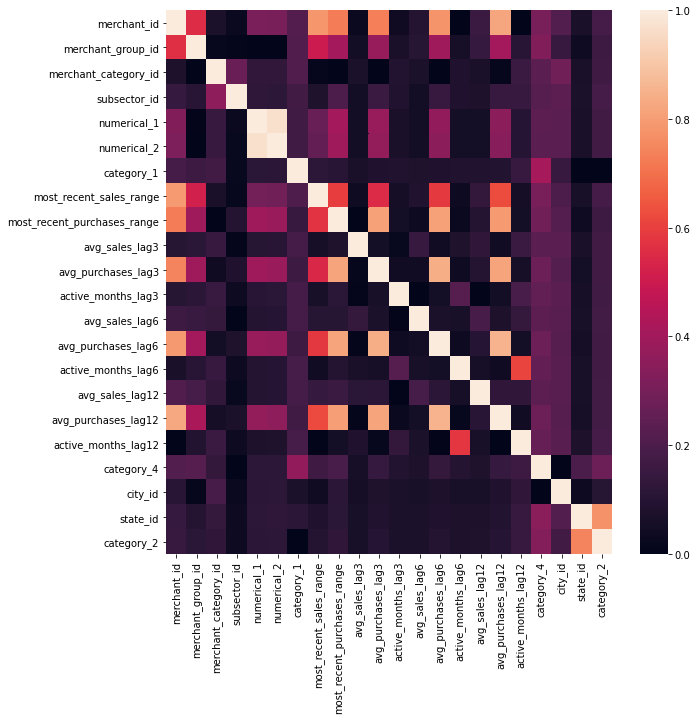

In [ ]:
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
corr = merchants.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_norm=np.round((corr-corr.min())/(corr.max()-corr.min()), 3)
plt.figure(figsize=(10,10))
sns.heatmap(corr_norm, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=False)

1. we can clearly see that the numerical1 and numerical2 features are almost overlapping with each other so have much correlation so need to remove 1.
2. state_id and category_2 are also fairely correlated.
3. all the purchase lags are correlated with each other and other features too.

### 4.10. Cheking some features with loyalty scores

We would first merege merchants with transactions history on merchant id then them merge it with train on card_id.So, that se an see the relation of features with target variable.

In [ ]:
new_merchants=merchants[['merchant_id', 'avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12','active_months_lag3', 'active_months_lag6', 'active_months_lag12']]

In [ ]:
trans=hist_trans[['card_id','merchant_id']]
trans1=new_merchant_trans[['card_id','merchant_id']]

In [ ]:
transactions=trans.append(trans1, ignore_index=True)

In [ ]:
data=pd.merge(transactions, new_merchants, on='merchant_id', how='left')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328675 entries, 0 to 32328674
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   card_id              object 
 1   merchant_id          object 
 2   avg_sales_lag3       float32
 3   avg_sales_lag6       float32
 4   avg_sales_lag12      float32
 5   active_months_lag3   float64
 6   active_months_lag6   float64
 7   active_months_lag12  float64
dtypes: float32(3), float64(3), object(2)
memory usage: 1.8+ GB


In [ ]:
data1 = data.groupby('card_id', as_index=False)[['active_months_lag3', 'active_months_lag6', 'active_months_lag12']].sum().round(0)

In [ ]:
data2 = data.groupby('card_id', as_index=False)[['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12']].sum().round(0)

In [ ]:
train_df4=pd.merge(train, data1, on='card_id', how= 'left')

In [ ]:
train_df5=pd.merge(train, data2, on='card_id', how= 'left')

In [ ]:
train_df4.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,active_months_lag3,active_months_lag6,active_months_lag12
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,846.0,1691.0,3348.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,1113.0,2226.0,4401.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,135.0,270.0,533.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,288.0,576.0,1094.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,531.0,1061.0,2068.0


In [ ]:
train_df5.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,352.0,1904.0,2175.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,453.0,761.0,817.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,51.0,53.0,54.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,151.0,163.0,164.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,420.0,561.0,585.0


In [ ]:
bins = np.percentile(train_df4['active_months_lag3'], range(0,101,10))
train_df4['binned_active_months_lag3'] = pd.cut(train_df4['active_months_lag3'], bins)
bins1 = np.percentile(train_df4['active_months_lag6'], range(0,101,10))
train_df4['binned_active_months_lag6'] = pd.cut(train_df4['active_months_lag6'], bins1)
bins2 = np.percentile(train_df4['active_months_lag12'], range(0,101,10))
train_df4['binned_active_months_lag12'] = pd.cut(train_df4['active_months_lag12'], bins2)

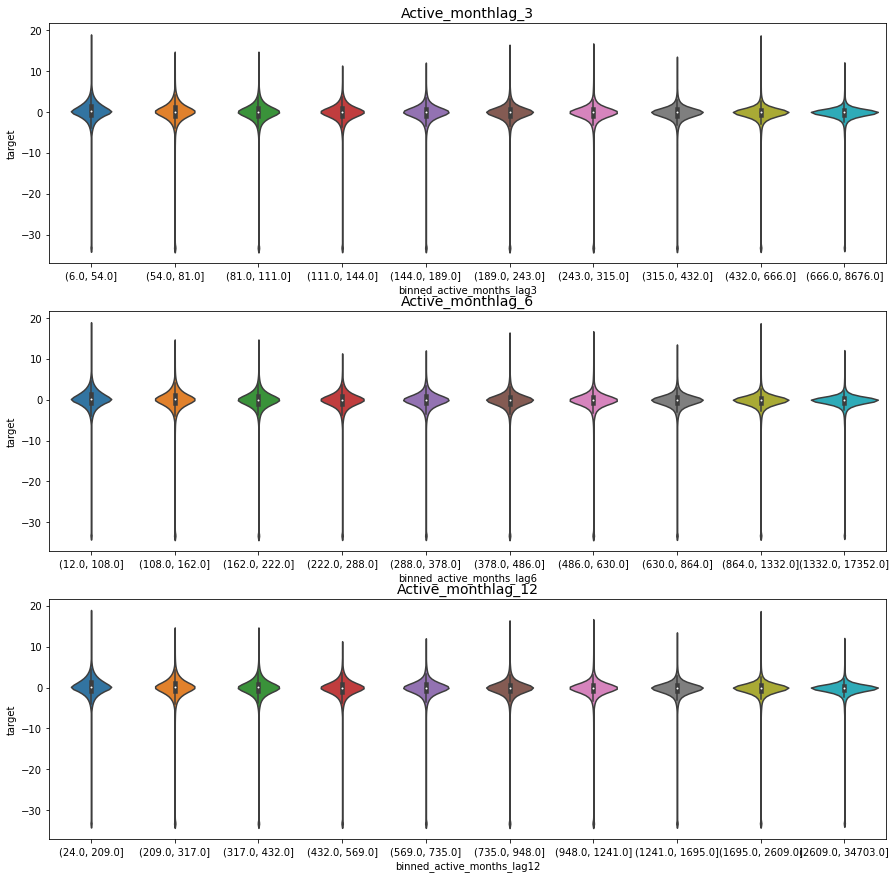

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (15,15))
sns.violinplot(x='binned_active_months_lag3',y='target',data=train_df4,showfliers=False,ax=ax[0])
ax[0].set_title('Active_monthlag_3',  fontsize = 14) 
sns.violinplot(x='binned_active_months_lag6',y='target',data=train_df4,showfliers=False,ax=ax[1])
ax[1].set_title('Active_monthlag_6',  fontsize = 14)
sns.violinplot(x='binned_active_months_lag12',y='target',data=train_df4,showfliers=False,ax=ax[2])
ax[2].set_title('Active_monthlag_12',  fontsize = 14)
plt.show()

We can clearly see that As active month lag increases the loyalty scores decreases.

In [ ]:
bins = np.percentile(train_df5['avg_sales_lag3'], range(0,101,10))
train_df5['binned_avg_sales_lag3'] = pd.cut(train_df5['avg_sales_lag3'], bins)
bins1 = np.percentile(train_df5['avg_sales_lag6'], range(0,101,10))
train_df5['binned_avg_sales_lag6'] = pd.cut(train_df5['avg_sales_lag6'], bins1)
bins2 = np.percentile(train_df5['avg_sales_lag12'], range(0,101,10))
train_df5['binned_avg_sales_lag12'] = pd.cut(train_df5['avg_sales_lag12'], bins2)

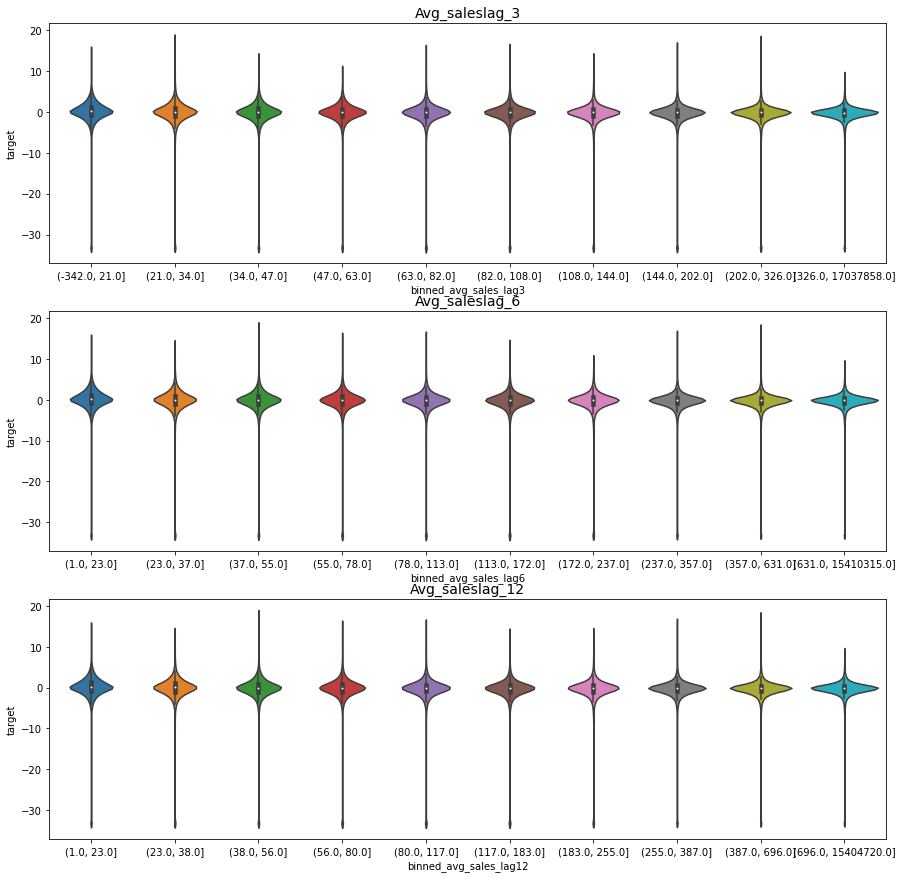

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (15,15))
sns.violinplot(x='binned_avg_sales_lag3',y='target',data=train_df5,showfliers=False,ax=ax[0])
ax[0].set_title('Avg_saleslag_3',  fontsize = 14) 
sns.violinplot(x='binned_avg_sales_lag6',y='target',data=train_df5,showfliers=False,ax=ax[1])
ax[1].set_title('Avg_saleslag_6',  fontsize = 14)
sns.violinplot(x='binned_avg_sales_lag12',y='target',data=train_df5,showfliers=False,ax=ax[2])
ax[2].set_title('Avg_saleslag_12',  fontsize = 14)
plt.show()

We can clearly see that As average sales lag increases the loyalty scores decreases.

### 4.11.Exploring some bivariate plots

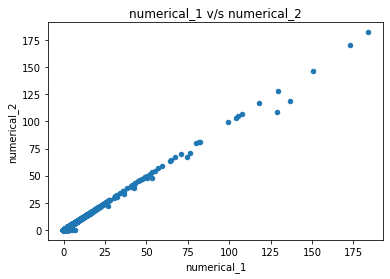

In [ ]:
merchants[["numerical_1", "numerical_2"]].plot.scatter(x="numerical_1", y="numerical_2")
plt.title('numerical_1 v/s numerical_2')
plt.show()

This two features are heavily correlated so onr of them should be dropped

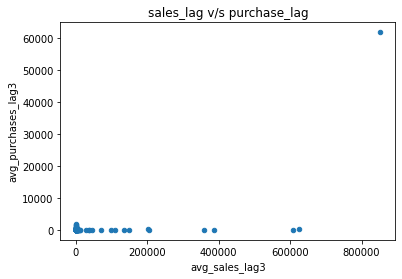

In [ ]:
merchants[["avg_sales_lag3", "avg_purchases_lag3"]].plot.scatter(x="avg_sales_lag3", y="avg_purchases_lag3")
plt.title('sales_lag v/s purchase_lag')
plt.show()

We cannot infer much from this graph as disturubution does not follow any particular pattern. Data must be preprocessed as we can see some of the weired points.